# Import Necessary Libraries

In [1]:
import numpy as np  # For computational stuff
import pandas as pd # For dataframe
import matplotlib.pyplot as plt # For plotting purpose

In [2]:
# If you are running in colab
# Either give the directory from your Mount GDrive
# pwdDir = '/content/drive/My Drive/Kaggle/House Price Regression/'
pwdDir = './'
# OR you can download dataset given by Kaggle competition
# with given Kaggle API
# Link: https://www.kaggle.com/general/51898

# Uncomment below list of codes if you want to download
# from kaggle

# import os
# os.environ['KAGGLE_USERNAME'] = "xxxxxx" # username from the json file
# os.environ['KAGGLE_KEY'] = "xxxxxxxxxxxxxxxxxxxxxxxxxxxx" # key from the json file
# !kaggle datasets download -d iarunava/happy-house-dataset # api copied from kaggle

# Read .csv file

## Read training file (train.csv)

In [3]:
train_df = pd.read_csv(pwdDir+'train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Read test file (test.csv)

In [4]:
test_df = pd.read_csv(pwdDir+'test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Getting Idea of this data

## Information of this train data

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<u>Observation:</u> Look like some features have missing values. So, we have to handle this problem. 

## List of Numerial and Categorical Features

Read the data desciption provided by kaggle organiser and make a list of category column names.

(Remember, it's depends on domain experts)

In [6]:
# Dict of features that are categorical
# I have seen like in 'Utilities' features, it contain two values: ['AllPub','NoSeWa']
# where as in data description, it has 4 values: ['AllPub','NoSewr','NoSeWa','ELO']
category_column = {
    'MSSubClass': [20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190],
    'MSZoning': ['A','C','FV','I','RH','RL','RP','RM'],
    'Street': ['Grvl','Pave'],
    'Alley': ['Grvl','Pave','NA'],
    'LotShape': ['Reg','IR1','IR2','IR3'],
    'LandContour': ['Lvl','Bnk','HLS','Low'],
    'Utilities': ['AllPub','NoSewr','NoSeWa','ELO'],
    'LotConfig': ['Inside','Corner','CulDSac','FR2','FR3'],
    'LandSlope': ['Gtl','Mod','Sev'],
    'Neighborhood': ['Blmngtn','Blueste','BrDale','BrkSide','ClearCr','CollgCr',\
                     'Crawfor','Edwards','Gilbert','IDOTRR','MeadowV','Mitchel',\
                     'Names','NoRidge','NPkVill','NridgHt','NWAmes','OldTown',\
                     'SWISU','Sawyer','SawyerW','Somerst','StoneBr','Timber','Veenker'],
    'Condition1': ['Artery','Feedr','Norm','RRNn','RRAn','PosN','PosA','RRNe','RRAe'],
    'Condition2': ['Artery','Feedr','Norm','RRNn','RRAn','PosN','PosA','RRNe','RRAe'],
    'BldgType': ['1Fam','2FmCon','Duplx','TwnhsE','TwnhsI'],
    'HouseStyle': ['1Story','1.5Fin','1.5Unf','2Story','2.5Fin','2.5Unf',\
                   'SFoyer','SLvl'],
    'OverallQual': [10,9,8,7,6,5,4,3,2,1],
    'OverallCond': [10,9,8,7,6,5,4,3,2,1],
    'RoofStyle': ['Flat','Gable','Gambrel','Hip','Mansard','Shed'],
    'RoofMatl': ['ClyTile','CompShq','Membran','Metal','Roll','Tar&Grv',\
                   'WdShake','WdShngl'],
    'Exterior1st': ['AsbShng','AsphShn','BrkComm','BrkFace','CBlock',\
                    'CemntBd','HdBoard','ImStucc','MetalSd','Other',\
                    'Plywood','PreCast','Stone','Stucco','VinylSd',\
                    'Wd Sdng','WdShing'],
    'Exterior2nd': ['AsbShng','AsphShn','BrkComm','BrkFace','CBlock',\
                    'CemntBd','HdBoard','ImStucc','MetalSd','Other',\
                    'Plywood','PreCast','Stone','Stucco','VinylSd',\
                    'Wd Sdng','WdShing'],
    'MasVnrType': ['BrkCmn','BrkFace','CBlock','None','Stone'],
    'ExterQual': ['Ex','Gd','TA','Fa','Po'],
    'ExterCond': ['Ex','Gd','TA','Fa','Po'],
    'Foundation': ['BrkTil','CBlock','PConc','Slab','Stone','Wood'],
    'BsmtQual': ['Ex','Gd','TA','Fa','Po','NA'],
    'BsmtCond': ['Ex','Gd','TA','Fa','Po','NA'],
    'BsmtExposure': ['Gd','Av','Mn','No','NA'],
    'BsmtFinType1': ['GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA'],
    'BsmtFinType2': ['GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA'],
    'Heating': ['Floor','GasA','GasW','Grav','OthW','Wall'],
    'HeatingQC': ['Ex','Gd','TA','Fa','Po'],
    'CentralAir': ['N','Y'],
    'Electrical': ['SBrkr','FuseA','FuseF','FuseP','Mix'],
    'KitchenQual': ['Ex','Gd','TA','Fa','Po'],
    'Functional': ['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal'],
    'FireplaceQu': ['Ex','Gd','TA','Fa','Po','NA'],
    'GarageType': ['2Types','Attchd','Basment','BuiltIn','CarPort','Detchd','NA'],
    'GarageFinish': ['Fin','RFn','Unf','NA'],
    'GarageQual': ['Ex','Gd','TA','Fa','Po','NA'],
    'GarageCond': ['Ex','Gd','TA','Fa','Po','NA'],
    'PavedDrive': ['Y','P','N'],
    'PoolQC': ['Ex','Gd','TA','Fa','NA'],
    'Fence': ['GdPrv','MnPrv','GdWo','MnWw','NA'],
    'MiscFeature': ['Elev','Gar2','Othr','Shed','TenC','NA'],
    'SaleType': ['WD','CWD','VWD','New','COD','Con','ConLw','ConLI','ConLD','Oth'],
    'SaleCondition': ['Normal','Abnormal','AdjLand','Alloca','Family','Partial']                   
}

# These are list of features where NA as a categorical value.
# It means NaN have the value for this feature
none_column = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',\
               'BsmtFinType2','FireplaceQu','GarageType','GarageFinish',\
               'GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [7]:
numerical_column = []
for col in list(train_df.columns):
    if col not in list(category_column.keys()):
        numerical_column.append(col)

numerical_column

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

# Handling Missing Value

Data cleaning alongside with handling missing data

In [8]:
def printing_values_for_column(catgry_column, tr_df, column_name):
    '''
    Print the list of values present in train column and actual column provide by data description
  
    Parameters:
    catgry_column: (dict) contain column name as key and categorical value as values
    tr_df: (DataFrame) train dataset
    column_name: (string) Column name present in train data
    '''
    if tr_df[column_name].isna().any():
        print('There is missing value')
    else:
        print('Value provide by data description:\n',sorted(catgry_column[column_name]))
        print('Value from train column:\n',sorted(tr_df[column_name].unique()))

Printing function is defined so that you cross-check the misspelled string

In [9]:
# Now what if we have null value when we do testing. So, we need to store some value to fill null value in testing stage
fillna_value = dict()

## MSSubClass

In [10]:
printing_values_for_column(category_column, train_df,'MSSubClass')

Value provide by data description:
 [20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190]
Value from train column:
 [20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 160, 180, 190]


In [11]:
# You can also check that there is not missing value 'nan' listed in above output
# 'value from train column'
# Store the mode value into dict()
fillna_value['MSSubClass'] = train_df['MSSubClass'].mode()[0]

In [12]:
fillna_value['MSSubClass']

20

Simultaneously, we can do test since we are dealing 80 features, which is time consuming

In [13]:
# Is there null value in test data?
print(test_df['MSSubClass'].isna().any())

False


## MSZoning

In [14]:
printing_values_for_column(category_column, train_df, 'MSZoning')

Value provide by data description:
 ['A', 'C', 'FV', 'I', 'RH', 'RL', 'RM', 'RP']
Value from train column:
 ['C (all)', 'FV', 'RH', 'RL', 'RM']


In [15]:
# No missing value 'nan' listed in above output
# 'C (all)' wasn't describe in data description.
# So we will replace'C (all)' with 'C' and making inplace=True will update the DataFrame
train_df['MSZoning'].replace(to_replace='C (all)', value='C', inplace=True)

In [16]:
# Store the mode value into dict()
fillna_value['MSZoning'] = train_df['MSZoning'].mode()[0]

In [17]:
fillna_value['MSZoning']

'RL'

In [18]:
# Is there null value in test?
print(test_df['MSZoning'].isna().any())

True


In [19]:
# Yes! Okay, fill empty value by replacing precomputed by fillna_value (dict)
test_df['MSZoning'].fillna(fillna_value['MSZoning'], inplace=True)
# Check everything is alright?
test_df['MSZoning'].unique()

array(['RH', 'RL', 'RM', 'FV', 'C (all)'], dtype=object)

In [20]:
# Uh-Oh! There is also 'C (all)' present in it. Replace it with 'C'
test_df['MSZoning'].replace(to_replace='C (all)', value='C', inplace=True)

## LotFrontage

In [21]:
# It is numerical feature.
# Check if there is null value?
print(train_df['LotFrontage'].isna().any())

True


In [22]:
# Calculate fraction of missing value among all dataset
print((train_df['LotFrontage'].isna().sum()/train_df.shape[0])*100,'%')

17.73972602739726 %


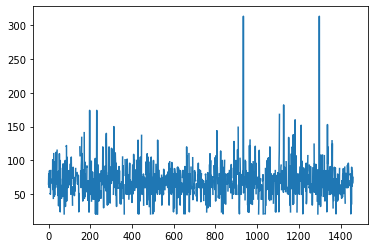

In [23]:
plt.plot(train_df['LotFrontage'])
plt.show()

<u> Observation </u> We will take 200 as a maximum value as some points are exceeding above 200

In [24]:
# Count the number of sample will be present if we remove those sample which
# have greater than 200
count = 0
store_value = []
for i in train_df['LotFrontage']:
    if np.isnan(i):
        count += 1
    elif i <= 200:
        count += 1
        store_value.append(i)
    else:
        continue

total_frac = (count/train_df.shape[0])*100
print('Number of sample will be remaining:',count,'({} %)'.format(total_frac))

Number of sample will be remaining: 1458 (99.86301369863013 %)


In [25]:
# Store the fillna value into dict()
fillna_value['LotFrontage'] = np.mean(store_value)
fillna_value['LotFrontage']

69.64470391993328

In [26]:
# Replace nan with mean value
train_df['LotFrontage'].fillna(fillna_value['LotFrontage'], inplace=True)
# Check it again if any missing value left?
print(train_df['LotFrontage'].isna().any())

False


In [27]:
# Remove that are greater than 200
train_df = train_df[train_df['LotFrontage'] <= 200]
train_df.shape # Check the number of samples

(1458, 81)

In [28]:
# Check missing value in test data
print(test_df['LotFrontage'].isna().any())

True


In [29]:
# Yes! TO replace it with fillna value
test_df['LotFrontage'].fillna(fillna_value['LotFrontage'], inplace=True)

In [30]:
# Check it again any missing value in test data?
print(test_df['LotFrontage'].isna().any())

False


## LotArea

In [31]:
# It is numerical feature
# Check if there any missing value
print(train_df['LotArea'].isna().any())

False


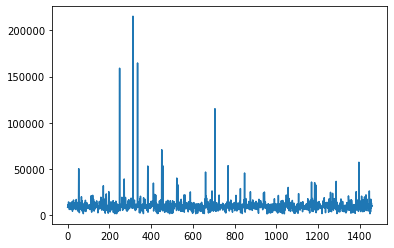

In [32]:
# Plot the graph to see if any outlier
plt.plot(train_df['LotArea'])
plt.show()

In [33]:
# Number of sample remains after removing samples whose value greater than 50000
count = train_df[train_df['LotArea'] <= 50000].shape[0]
total_frac = count/train_df.shape[0]
print('Total sample remains after removing:',count,'({})'.format(total_frac))

Total sample remains after removing: 1448 (0.9931412894375857)


In [34]:
# Remove the samples that are greater than 50K
train_df = train_df[train_df['LotArea'] <= 50000]
train_df.shape

(1448, 81)

In [35]:
# Store the fillna value into dict()
fillna_value['LotArea'] = train_df['LotArea'].mean()
fillna_value['LotArea']

9855.599447513812

In [36]:
# Check if any missing value in test data
print(test_df['LotArea'].isna().any())

False


## Street

In [37]:
# It is categorical feature
printing_values_for_column(category_column,train_df,'Street')

Value provide by data description:
 ['Grvl', 'Pave']
Value from train column:
 ['Grvl', 'Pave']


In [38]:
# Well! There is no mispelled. Let move on
# There is no missing value 'nan' from above output 'value from  train column'

In [39]:
# Store the fillna value into dict()
fillna_value['Street'] = train_df['Street'].mode()[0]
fillna_value['Street']

'Pave'

In [40]:
# Check missing value in test data
print(test_df['Street'].isna().any())

False


## Alley

In [41]:
# It is category feature
printing_values_for_column(category_column,train_df,'Alley')

There is missing value


In [42]:
# Convert np.nan or nan(float) into string
train_df['Alley'].replace(to_replace=np.nan, value='NA').unique()
# Remember I've not updated DataFrame yet. I just want to observe
# If there is any other value other than 'nan'.

array(['NA', 'Grvl', 'Pave'], dtype=object)

In [43]:
# Now you see 'nan' value has some value as per data description.
# NA: No alley assess. So, we will replace 'nan' into 'NA'
train_df['Alley'].replace(to_replace=np.nan, value='NA', inplace=True)

In [44]:
# Any missing value left
print(train_df['Alley'].isna().any())

False


In [45]:
# Store the fillna value into dict()
fillna_value['Alley'] = train_df['Alley'].mode()[0]
fillna_value['Alley']

'NA'

In [46]:
# Check if any missing value in test
print(test_df['Alley'].isna().any())

True


In [47]:
# Replace with fillna value
test_df['Alley'].replace(to_replace=np.nan,value='NA',inplace=True)

In [48]:
# Check if any missing value still in test
print(test_df['Alley'].isna().any())

False


## LotShape

In [49]:
# It is category feature
printing_values_for_column(category_column, train_df, 'LotShape')

Value provide by data description:
 ['IR1', 'IR2', 'IR3', 'Reg']
Value from train column:
 ['IR1', 'IR2', 'IR3', 'Reg']


In [50]:
# No mispelled. No missing values
# Store the fillna value into dict()
fillna_value['LotShape'] = train_df['LotShape'].mode()[0]
fillna_value['LotShape']                                                     

'Reg'

In [51]:
# Check if missing value in test data?
print(test_df['LotShape'].isna().any())

False


## LandContour

In [52]:
# It is category feature
printing_values_for_column(category_column, train_df,'LandContour')

Value provide by data description:
 ['Bnk', 'HLS', 'Low', 'Lvl']
Value from train column:
 ['Bnk', 'HLS', 'Low', 'Lvl']


In [53]:
# No mispelled. No missing value
# Store the fillna value into dict()
fillna_value['LandContour'] = train_df['LandContour'].mode()[0]
fillna_value['LandContour']

'Lvl'

In [54]:
# Check if any missing value in test data?
print(test_df['LandContour'].isna().any())

False


## Utilities

In [55]:
# It is category feature
printing_values_for_column(category_column,train_df,'Utilities')

Value provide by data description:
 ['AllPub', 'ELO', 'NoSeWa', 'NoSewr']
Value from train column:
 ['AllPub', 'NoSeWa']


In [56]:
# No mispelled. No missing value
# Store the fillna value into dict()
fillna_value['Utilities']= train_df['Utilities'].mode()[0]
fillna_value['Utilities']

'AllPub'

In [57]:
# Check if any missing value in test data?
print(test_df['Utilities'].isna().any())

True


In [58]:
# Fill nan by fillna precomputed
test_df['Utilities'].replace(to_replace=np.nan, value=fillna_value['Utilities'], inplace=True)

In [59]:
# Check again any missing value in test data?
print(test_df['Utilities'].isna().any())

False


## LotConfig

In [60]:
# It is category feature
printing_values_for_column(category_column,train_df,'LotConfig')

Value provide by data description:
 ['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside']
Value from train column:
 ['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside']


In [61]:
# No mispelled and missing value.
# Store fillna value into dict()
fillna_value['LotConfig'] = train_df['LotConfig'].mode()[0]
fillna_value['LotConfig']

'Inside'

In [62]:
# Check if any missing value in test data?
print(test_df['LotConfig'].isna().any())

False


## LandSlope

In [63]:
# It is category feature
printing_values_for_column(category_column,train_df,'LandSlope')

Value provide by data description:
 ['Gtl', 'Mod', 'Sev']
Value from train column:
 ['Gtl', 'Mod', 'Sev']


In [64]:
# No mispelled and missing value
# Store the fillna value into dict()
fillna_value['LandSlope'] = train_df['LandSlope'].mode()[0]
fillna_value['LandSlope']

'Gtl'

In [65]:
# Check if any missing value in test data?
print(test_df['LandSlope'].isna().any())

False


## Neighborhood

In [66]:
# It is category feature
printing_values_for_column(category_column,train_df,'Neighborhood')

Value provide by data description:
 ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NPkVill', 'NWAmes', 'Names', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']
Value from train column:
 ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']


In [67]:
# Found mispelled 'NAmes' which is actually should have 'Names'
# Replace NAmes with Names
train_df['Neighborhood'].replace(to_replace='NAmes', value='Names', inplace=True)

In [68]:
# Check again if any mispelled left?
printing_values_for_column(category_column,train_df,'Neighborhood')

Value provide by data description:
 ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NPkVill', 'NWAmes', 'Names', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']
Value from train column:
 ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NPkVill', 'NWAmes', 'Names', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']


In [69]:
# Great and no missing value
# Store the fillna value into dict()
fillna_value['Neighborhood'] = train_df['Neighborhood'].mode()[0]
fillna_value['Neighborhood']

'Names'

In [70]:
# Check if any missing value in test data?
print(test_df['Neighborhood'].isna().any())

False


In [71]:
# Also check if any mispelled present as it was present in train data
printing_values_for_column(category_column,test_df,'Neighborhood')

Value provide by data description:
 ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NPkVill', 'NWAmes', 'Names', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']
Value from train column:
 ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']


In [72]:
# Yes, there it is. Replace it
test_df['Neighborhood'].replace(to_replace='NAmes',value='Names', inplace=True)

## Condition1

In [73]:
# It is categorical feature
printing_values_for_column(category_column,train_df,'Condition1')

Value provide by data description:
 ['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn']
Value from train column:
 ['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn']


In [74]:
# No mispelled and missing value.
# Store the fillna value into dict()
fillna_value['Condition1'] = train_df['Condition1'].mode()[0]
fillna_value['Condition1']

'Norm'

In [75]:
# Check if any missing value in test data?
print(test_df['Condition1'].isna().any())

False


## Condition2

In [76]:
# It is categorical feature
printing_values_for_column(category_column,train_df,'Condition2')

Value provide by data description:
 ['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn']
Value from train column:
 ['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn']


In [77]:
# No mispelled and missing value
# Store fillna value into dict()
fillna_value['Condition2'] = train_df['Condition2'].mode()[0]
fillna_value['Condition2']

'Norm'

In [78]:
# Check if any missing value in test data
print(test_df['Condition2'].isna().any())

False


## BldgType

In [79]:
# It is categorical feature
printing_values_for_column(category_column,train_df,'BldgType')

Value provide by data description:
 ['1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI']
Value from train column:
 ['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE']


In [80]:
# There are multiple mispelled. Let Replace it
train_df['BldgType'].replace({'2fmCon':'2FmCon',
                              'Duplex':'Duplx',
                              'Twnhs':'TwnhsI'}, inplace=True)

In [81]:
# Check cross spelled again
printing_values_for_column(category_column,train_df,'BldgType')

Value provide by data description:
 ['1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI']
Value from train column:
 ['1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI']


In [82]:
# No missing value.
# Store the fillna value
fillna_value['BldgType'] = train_df['BldgType'].mode()[0]
fillna_value['BldgType']

'1Fam'

In [83]:
# Check if any missing value in test data?
print(test_df['BldgType'].isna().any())

False


In [84]:
# Also crosschecl mispelled as it found in train_df
printing_values_for_column(category_column,test_df,'BldgType')

Value provide by data description:
 ['1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI']
Value from train column:
 ['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE']


In [85]:
# There it is. Replace it
test_df['BldgType'].replace({'2fmCon':'2FmCon',
                              'Duplex':'Duplx',
                              'Twnhs':'TwnhsI'}, inplace=True)

In [86]:
# Cross mispelled check
printing_values_for_column(category_column,test_df,'BldgType')

Value provide by data description:
 ['1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI']
Value from train column:
 ['1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI']


## HouseStyle

In [87]:
# It is categorical feature
printing_values_for_column(category_column,train_df,'HouseStyle')

Value provide by data description:
 ['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl']
Value from train column:
 ['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl']


In [88]:
# No mispelled and missing value
# Store the fillna value into dict()
fillna_value['HouseStyle'] = train_df['HouseStyle'].mode()[0]
fillna_value['HouseStyle']

'1Story'

In [89]:
# Check if any missing value in test data
print(test_df['HouseStyle'].isna().any())

False


## OverallQual

In [90]:
# It is categorical feature
printing_values_for_column(category_column,train_df,'OverallQual')

Value provide by data description:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Value from train column:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [91]:
# No mispelled and missing value
# Store the fillna value into dict()
fillna_value['OverallQual'] = train_df['OverallQual'].mode()[0]
fillna_value['OverallQual']

5

In [92]:
# Check if any missing value in test data
print(test_df['OverallQual'].isna().any())

False


## OverallCond

In [93]:
# It is categorical feature
printing_values_for_column(category_column,train_df,'OverallCond')

Value provide by data description:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Value from train column:
 [1, 2, 3, 4, 5, 6, 7, 8, 9]


In [94]:
# No missing value and mispelled
# Store the fillna value in dict()
fillna_value['OverallCond'] = train_df['OverallCond'].mode()[0]
fillna_value['OverallCond']

5

In [95]:
# Check if any missing value in test data
print(test_df['OverallCond'].isna().any())

False


## YearBuilt, YearRemodAdd

In [96]:
# We can create a new feature engineering with these two features
# AgeRemod: 'Years taken to remodel the original construction'
train_df['AgeRemod'] = train_df['YearRemodAdd'] - train_df['YearBuilt']
train_df['AgeRemod']

0        0
1        0
2        1
3       55
4        0
        ..
1455     1
1456    10
1457    65
1458    46
1459     0
Name: AgeRemod, Length: 1448, dtype: int64

In [97]:
# Check if any negative value appear?
train_df[train_df['AgeRemod'] < 0]['AgeRemod']

Series([], Name: AgeRemod, dtype: int64)

In [98]:
# Now remove these two columns as we not needed.
train_df.drop(['YearRemodAdd','YearBuilt'], axis=1, inplace=True)

In [99]:
# Similarly for test data
test_df['AgeRemod'] = test_df['YearRemodAdd'] - test_df['YearBuilt']
test_df.drop(['YearRemodAdd','YearBuilt'], axis=1, inplace=True)

In [100]:
# Check if any negative value appear?
test_df[test_df['AgeRemod'] < 0]['AgeRemod']

416   -1
Name: AgeRemod, dtype: int64

In [101]:
# Yes its seems to be appeared. Make it to 0 value
# You can use test_df.info() to get the column index of 'AgeRemod' feature
test_df.iloc[416,78] = 0

In [102]:
test_df[test_df['AgeRemod'] < 0]['AgeRemod']

Series([], Name: AgeRemod, dtype: int64)

## RoofStyle

In [103]:
# It's categorical feature
printing_values_for_column(category_column, train_df,'RoofStyle')

Value provide by data description:
 ['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed']
Value from train column:
 ['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed']


In [104]:
# No mispelled or missing value.
# Store the fillna value into dict()
fillna_value['RoofStyle'] = train_df['RoofStyle'].mode()[0]
fillna_value['RoofStyle']

'Gable'

In [105]:
# Check if missing value in test data?
test_df['RoofStyle'].isna().any()

False

## Exterior1st

In [106]:
# It's categorical feature
printing_values_for_column(category_column,train_df,'Exterior1st')

Value provide by data description:
 ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing']
Value from train column:
 ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Plywood', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing']


In [107]:
# No mispelled and missing value
fillna_value['Exterior1st'] = train_df['Exterior1st'].mode()[0]
fillna_value['Exterior1st']

'VinylSd'

In [108]:
# Check if any missing value in test data?
test_df['Exterior1st'].isna().any()

True

In [109]:
# There it is. fill it with fillna value
test_df['Exterior1st'].replace(to_replace=np.nan,value=fillna_value['Exterior1st'], inplace=True)

In [110]:
# Check again if any missing value in test data?
test_df['Exterior1st'].isna().any()

False

In [111]:
# Check if any mispelled in test data
printing_values_for_column(category_column,test_df,'Exterior1st')

Value provide by data description:
 ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing']
Value from train column:
 ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'MetalSd', 'Plywood', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing']


## Exterior2nd

In [112]:
# It's categorical feature
printing_values_for_column(category_column,train_df,'Exterior2nd')

Value provide by data description:
 ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing']
Value from train column:
 ['AsbShng', 'AsphShn', 'Brk Cmn', 'BrkFace', 'CBlock', 'CmentBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'Wd Shng']


In [113]:
# Found two mispelled and no missing value.
train_df['Exterior2nd'].replace({'Brk Cmn':'BrkComm',
                                 'Wd Shng':'WdShing'}, inplace=True)

In [114]:
# Store fillna value into dict()
fillna_value['Exterior2nd'] = train_df['Exterior2nd'].mode()[0]
fillna_value['Exterior2nd']

'VinylSd'

In [115]:
# Check if any missing value in test data
test_df['Exterior2nd'].isna().any()

True

In [116]:
# There it is. Replace with fillna value
test_df['Exterior2nd'].replace(to_replace=np.nan,value=fillna_value['Exterior2nd'], inplace=True)

In [117]:
# Check again if any missing value in test data
test_df['Exterior2nd'].isna().any()

False

In [118]:
# Check if any mispelled in test data as we found in train data
printing_values_for_column(category_column,test_df,'Exterior2nd')

Value provide by data description:
 ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing']
Value from train column:
 ['AsbShng', 'AsphShn', 'Brk Cmn', 'BrkFace', 'CBlock', 'CmentBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Plywood', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'Wd Shng']


In [119]:
# 2 mispelled found. Replace it
test_df['Exterior2nd'].replace({'Brk Cmn':'BrkComm',
                                 'Wd Shng':'WdShing'}, inplace=True)

## MasVnrType

In [120]:
# It's categorical feature
printing_values_for_column(category_column,train_df,'MasVnrType')

There is missing value


In [121]:
# Also mentioned in data_description.txt that missing value or na means None.
# so we will replace with 'None' value.
# Remember! Add None as a string (not keyword)
train_df['MasVnrType'].fillna('None', inplace=True)

In [122]:
# Let check if any mispelled
printing_values_for_column(category_column,train_df,'MasVnrType')

Value provide by data description:
 ['BrkCmn', 'BrkFace', 'CBlock', 'None', 'Stone']
Value from train column:
 ['BrkCmn', 'BrkFace', 'None', 'Stone']


In [123]:
# No mispelled.
# Store the illna value into dict()
fillna_value['MasVnrType'] = train_df['MasVnrType'].mode()[0]
fillna_value['MasVnrType']

'None'

In [124]:
# Check if any missing value in test data?
test_df['MasVnrType'].isna().any()

True

In [125]:
# Yes, it is. Replace it with fillna value
test_df['MasVnrType'].fillna(fillna_value['MasVnrType'],inplace=True)

In [126]:
# Check again if any missing value in test data?
test_df['MasVnrType'].isna().any()

False

## MasVnrArea

In [127]:
# It's numerical feature
train_df['MasVnrArea'].isna().any()

True

In [128]:
# What fraction of missing value is
print(((train_df['MasVnrArea'].isna().sum()/train_df.shape[0])*100),'%')

0.5524861878453038 %


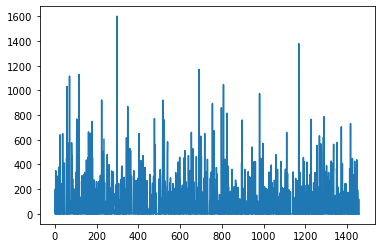

In [129]:
# Let see how numerical are distributed
plt.plot(train_df['MasVnrArea'])
plt.show()

<u>Observation</u>: Let take 1200 as maximum value because thera are few data points having above 1200 value 

In [130]:
# Count the number of sample will be present if we remove those sample which
# have greater than 1200
count = 0
store_value = []
for i in train_df['MasVnrArea']:
    if np.isnan(i):
        count += 1
    elif i <= 1200:
        count += 1
        store_value.append(i)
    else:
        continue

total_frac = (count/train_df.shape[0])*100
print('Number of sample will be remaining:',count,'({} %)'.format(total_frac))

Number of sample will be remaining: 1446 (99.86187845303867 %)


In [131]:
# Store the fillna value into dict()
fillna_value['MasVnrArea'] = np.mean(store_value)
fillna_value['MasVnrArea']

101.07858136300418

In [132]:
# Replace nan with mean value
train_df['MasVnrArea'].fillna(fillna_value['MasVnrArea'], inplace=True)
# Check it again if any missing value left?
print(train_df['MasVnrArea'].isna().any())

False


In [133]:
# Remove that are greater than 1200
train_df = train_df[train_df['MasVnrArea'] <= 1200]
train_df.shape # Check the number of samples

(1446, 80)

In [134]:
# Check missing value in test data
print(test_df['MasVnrArea'].isna().any())

True


In [135]:
# Yes! TO replace it with fillna value
test_df['MasVnrArea'].fillna(fillna_value['MasVnrArea'], inplace=True)

In [136]:
# Check it again any missing value in test data?
print(test_df['MasVnrArea'].isna().any())

False


## ExterQual

In [137]:
# It's categorical feature
printing_values_for_column(category_column,train_df,'ExterQual')

Value provide by data description:
 ['Ex', 'Fa', 'Gd', 'Po', 'TA']
Value from train column:
 ['Ex', 'Fa', 'Gd', 'TA']


In [138]:
# No mispelled and missing value
# Store the fillna value into dict()
fillna_value['ExterQual'] = train_df['ExterQual'].mode()[0]
fillna_value['ExterQual']

'TA'

In [139]:
# Check if any missing value in test data?
test_df['ExterQual'].isna().any()

False

## ExterCond

In [140]:
# It's categorical feature
printing_values_for_column(category_column,train_df,'ExterCond')

Value provide by data description:
 ['Ex', 'Fa', 'Gd', 'Po', 'TA']
Value from train column:
 ['Ex', 'Fa', 'Gd', 'Po', 'TA']


In [141]:
# No mispelled and missing value
# Store fillna value into dict()
fillna_value['ExterCond'] = train_df['ExterCond'].mode()[0]
fillna_value['ExterCond']

'TA'

In [142]:
# Check if any missing value in test data?
test_df['ExterCond'].isna().any()

False

## Foundation

In [143]:
# It's categorical feature
printing_values_for_column(category_column,train_df,'Foundation')

Value provide by data description:
 ['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood']
Value from train column:
 ['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood']


In [144]:
# No mispelled and missing value
# Store fillna value into dict()
fillna_value['Foundation'] = train_df['Foundation'].mode()[0]
fillna_value['Foundation']

'PConc'

In [145]:
# Check if any missing value in test data?
test_df['Foundation'].isna().any()

False

## BsmtQual

In [146]:
# It's categorical feature
printing_values_for_column(category_column,train_df,'BsmtQual')

There is missing value


In [147]:
# There is missing value. However, in data description.txt 
# it described NA as No basement
train_df['BsmtQual'].fillna('NA', inplace=True)

In [148]:
printing_values_for_column(category_column,train_df,'BsmtQual')

Value provide by data description:
 ['Ex', 'Fa', 'Gd', 'NA', 'Po', 'TA']
Value from train column:
 ['Ex', 'Fa', 'Gd', 'NA', 'TA']


In [149]:
# No mispelled
# Store fillna value into dict()
fillna_value['BsmtQual'] = train_df['BsmtQual'].mode()[0]
fillna_value['BsmtQual']

'TA'

In [150]:
# Check if any missing value in test data?
test_df['BsmtQual'].isna().any()

True

In [151]:
# Replace nan with string 'NA'
test_df['BsmtQual'].fillna('NA', inplace=True)

In [152]:
# Check again if any missing value in test data?
test_df['BsmtQual'].isna().any()

False

## BsmtCond

In [153]:
# It's categorical feature
printing_values_for_column(category_column,train_df,'BsmtCond')

There is missing value


In [154]:
# There is missing values. However, in data description.txt
# it described NA as No basement.
train_df['BsmtCond'].fillna('NA', inplace=True)

In [155]:
printing_values_for_column(category_column,train_df,'BsmtCond')

Value provide by data description:
 ['Ex', 'Fa', 'Gd', 'NA', 'Po', 'TA']
Value from train column:
 ['Fa', 'Gd', 'NA', 'Po', 'TA']


In [156]:
# No mispelled
# Store fillna value into dict()
fillna_value['BsmtCond'] = train_df['BsmtCond'].mode()[0]
fillna_value['BsmtCond']

'TA'

In [157]:
# Check if any missing value in test data?
test_df['BsmtCond'].isna().any()

True

In [158]:
# Replace na with string 'NA'
test_df['BsmtCond'].fillna('NA', inplace=True)

In [159]:
# Check again if any missing value in test data?
test_df['BsmtCond'].isna().any()

False

## BsmtExposure

In [160]:
# It's categorical feature
printing_values_for_column(category_column,train_df,'BsmtExposure')

There is missing value


In [161]:
# There is missing values. However, in data description.txt
# It described NA as No Basement
train_df['BsmtExposure'].fillna('NA', inplace=True)

In [162]:
printing_values_for_column(category_column,train_df,'BsmtExposure')

Value provide by data description:
 ['Av', 'Gd', 'Mn', 'NA', 'No']
Value from train column:
 ['Av', 'Gd', 'Mn', 'NA', 'No']


In [163]:
# No mispelled
# Store fillna value into dict()
fillna_value['BsmtExposure'] = train_df['BsmtExposure'].mode()[0]
fillna_value['BsmtExposure']

'No'

In [164]:
# Check if any missing value in test data?
test_df['BsmtExposure'].isna().any()

True

In [165]:
# replace nan with string NA
test_df['BsmtExposure'].fillna('NA', inplace=True)

In [166]:
# Check again if any missing value in test data?
test_df['BsmtExposure'].isna().any()

False

## BsmtFinType1

In [167]:
# It's categorical feature
printing_values_for_column(category_column,train_df,'BsmtFinType1')

There is missing value


In [168]:
# There is missing value. However, in data description.txt
# It described NA as No basement
train_df['BsmtFinType1'].fillna('NA',inplace=True)

In [169]:
printing_values_for_column(category_column,train_df,'BsmtFinType1')

Value provide by data description:
 ['ALQ', 'BLQ', 'GLQ', 'LwQ', 'NA', 'Rec', 'Unf']
Value from train column:
 ['ALQ', 'BLQ', 'GLQ', 'LwQ', 'NA', 'Rec', 'Unf']


In [170]:
# No mispelled
# Store fillna value inti dict()
fillna_value['BsmtFinType1'] = train_df['BsmtFinType1'].mode()[0]
fillna_value['BsmtFinType1']

'Unf'

In [171]:
# Check if any missing value in test data?
test_df['BsmtFinType1'].isna().any()

True

In [172]:
# replace na with string NA
test_df['BsmtFinType1'].fillna('NA', inplace=True)

In [173]:
# Check any if any missing value in test data?
test_df['BsmtFinType1'].isna().any()

False

## BsmtFinSF1

In [174]:
# It's numerical feature
train_df['BsmtFinSF1'].isna().any()

False

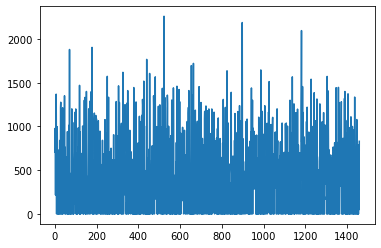

In [175]:
# No missing value
# Let see how numerical are distributed
plt.plot(train_df['BsmtFinSF1'])
plt.show()

<u>Observation</u>: Let take 2000 as maximum value because thera are few data points having above 2000 value 

In [176]:
# Count the number of sample will be present if we remove those sample which
# have greater than 2000
count = 0
store_value = []
for i in train_df['BsmtFinSF1']:
    if np.isnan(i):
        count += 1
    elif i <= 2000:
        count += 1
        store_value.append(i)
    else:
        continue

total_frac = (count/train_df.shape[0])*100
print('Number of sample will be remaining:',count,'({} %)'.format(total_frac))

Number of sample will be remaining: 1443 (99.79253112033194 %)


In [177]:
# Store the fillna value into dict()
fillna_value['BsmtFinSF1'] = np.mean(store_value)
fillna_value['BsmtFinSF1']

431.27442827442826

In [178]:
# Remove that are greater than 2000
train_df = train_df[train_df['BsmtFinSF1'] <= 2000]
train_df.shape # Check the number of samples

(1443, 80)

In [179]:
# Check missing value in test data
print(test_df['BsmtFinSF1'].isna().any())

True


In [180]:
# Yes! TO replace it with fillna value
test_df['BsmtFinSF1'].fillna(fillna_value['BsmtFinSF1'], inplace=True)

In [181]:
# Check it again any missing value in test data?
print(test_df['BsmtFinSF1'].isna().any())

False


## BsmtFinType2

In [182]:
# It's categorical features
printing_values_for_column(category_column,train_df,'BsmtFinType2')

There is missing value


In [183]:
# There is missing value. However, in data description.txt
# It described NA as No basement
train_df['BsmtFinType2'].fillna('NA',inplace=True)

In [184]:
printing_values_for_column(category_column,train_df,'BsmtFinType2')

Value provide by data description:
 ['ALQ', 'BLQ', 'GLQ', 'LwQ', 'NA', 'Rec', 'Unf']
Value from train column:
 ['ALQ', 'BLQ', 'GLQ', 'LwQ', 'NA', 'Rec', 'Unf']


In [185]:
# No mispelled
# Store fillna value inti dict()
fillna_value['BsmtFinType2'] = train_df['BsmtFinType2'].mode()[0]
fillna_value['BsmtFinType2']

'Unf'

In [186]:
# Check if any missing value in test data?
test_df['BsmtFinType2'].isna().any()

True

In [187]:
# replace na with string NA
test_df['BsmtFinType2'].fillna('NA', inplace=True)

In [188]:
# Check again if any missing value in test data?
test_df['BsmtFinType2'].isna().any()

False

## BsmtFinSF2

In [189]:
# It's numerical feature
train_df['BsmtFinSF2'].isna().any()

False

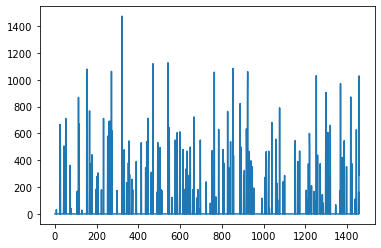

In [190]:
# No missing value
# Let see how numerical are distributed
plt.plot(train_df['BsmtFinSF2'])
plt.show()

<u>Observation</u>: Let take 1200 as maximum value because thera are few data points having above 1200 value 

In [191]:
# Count the number of sample will be present if we remove those sample which
# have greater than 1200
count = 0
store_value = []
for i in train_df['BsmtFinSF2']:
    if np.isnan(i):
        count += 1
    elif i <= 1200:
        count += 1
        store_value.append(i)
    else:
        continue

total_frac = (count/train_df.shape[0])*100
print('Number of sample will be remaining:',count,'({} %)'.format(total_frac))

Number of sample will be remaining: 1442 (99.93069993069993 %)


In [192]:
# Store the fillna value into dict()
fillna_value['BsmtFinSF2'] = np.mean(store_value)
fillna_value['BsmtFinSF2']

45.205963938973646

In [193]:
# Remove that are greater than 1200
train_df = train_df[train_df['BsmtFinSF2'] <= 1200]
train_df.shape # Check the number of samples

(1442, 80)

In [194]:
# Check missing value in test data
print(test_df['BsmtFinSF2'].isna().any())

True


In [195]:
# Yes! TO replace it with fillna value
test_df['BsmtFinSF2'].fillna(fillna_value['BsmtFinSF2'], inplace=True)

In [196]:
# Check again if any missing value in test data
print(test_df['BsmtFinSF2'].isna().any())

False


## BsmtUnfSF

In [197]:
# it's numerical feature
train_df['BsmtUnfSF'].isna().any()

False

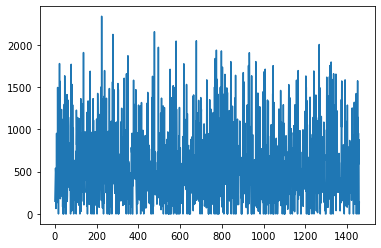

In [198]:
# No missing value
# Let see how numerical are distributed
plt.plot(train_df['BsmtUnfSF'])
plt.show()

<u>Observation</u>: Let take 2000 as maximum value because thera are few data points having above 2000 value 

In [199]:
# Count the number of sample will be present if we remove those sample which
# have greater than 2000
count = 0
store_value = []
for i in train_df['BsmtUnfSF']:
    if np.isnan(i):
        count += 1
    elif i <= 2000:
        count += 1
        store_value.append(i)
    else:
        continue

total_frac = (count/train_df.shape[0])*100
print('Number of sample will be remaining:',count,'({} %)'.format(total_frac))

Number of sample will be remaining: 1436 (99.58391123439667 %)


In [200]:
# Store the fillna value into dict()
fillna_value['BsmtUnfSF'] = np.mean(store_value)
fillna_value['BsmtUnfSF']

563.5480501392758

In [201]:
# Remove that are greater than 2000
train_df = train_df[train_df['BsmtUnfSF'] <= 2000]
train_df.shape # Check the number of samples

(1436, 80)

In [202]:
# Check missing value in test data
print(test_df['BsmtUnfSF'].isna().any())

True


In [203]:
# Yes! TO replace it with fillna value
test_df['BsmtUnfSF'].fillna(fillna_value['BsmtUnfSF'], inplace=True)

In [204]:
# Check again if any missing value in test data
print(test_df['BsmtUnfSF'].isna().any())

False


## TotalBsmtSF

In [205]:
# it's numerical feature
train_df['TotalBsmtSF'].isna().any()

False

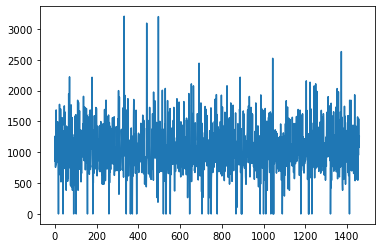

In [206]:
# No missing value
# Let see how numerical are distributed
plt.plot(train_df['TotalBsmtSF'])
plt.show()

<u>Observation</u>: Let take 2500 as maximum value because thera are few data points having above 2500 value 

In [207]:
# Count the number of sample will be present if we remove those sample which
# have greater than 2500
count = 0
store_value = []
for i in train_df['TotalBsmtSF']:
    if np.isnan(i):
        count += 1
    elif i <= 2500:
        count += 1
        store_value.append(i)
    else:
        continue

total_frac = (count/train_df.shape[0])*100
print('Number of sample will be remaining:',count,'({} %)'.format(total_frac))

Number of sample will be remaining: 1431 (99.65181058495823 %)


In [208]:
# Store the fillna value into dict()
fillna_value['TotalBsmtSF'] = np.mean(store_value)
fillna_value['TotalBsmtSF']

1035.6603773584907

In [209]:
# Remove that are greater than 2500
train_df = train_df[train_df['TotalBsmtSF'] <= 2500]
train_df.shape # Check the number of samples

(1431, 80)

In [210]:
# Check missing value in test data
print(test_df['TotalBsmtSF'].isna().any())

True


In [211]:
# Yes! TO replace it with fillna value
test_df['TotalBsmtSF'].fillna(fillna_value['TotalBsmtSF'], inplace=True)

In [212]:
# Check again if any missing value in test data
print(test_df['TotalBsmtSF'].isna().any())

False


## Heating

In [213]:
# it's categorical feature
printing_values_for_column(category_column,train_df,'Heating')

Value provide by data description:
 ['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall']
Value from train column:
 ['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall']


In [214]:
# No mispelled and missing value
# Store fillna value into dict()
fillna_value['Heating'] = train_df['Heating'].mode()[0]
fillna_value['Heating']

'GasA'

In [215]:
# Check mispelled and if any missing value in test data
printing_values_for_column(category_column,test_df,'Heating')

Value provide by data description:
 ['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall']
Value from train column:
 ['GasA', 'GasW', 'Grav', 'Wall']


## HeatingQC

In [216]:
# Its categorical feature
printing_values_for_column(category_column,train_df,'HeatingQC')

Value provide by data description:
 ['Ex', 'Fa', 'Gd', 'Po', 'TA']
Value from train column:
 ['Ex', 'Fa', 'Gd', 'Po', 'TA']


In [217]:
# No mispelled and missing value
# Store the fillna value into dict()
fillna_value['HeatingQC'] = train_df['HeatingQC'].mode()[0]
fillna_value['HeatingQC']

'Ex'

In [218]:
# Check if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'HeatingQC')

Value provide by data description:
 ['Ex', 'Fa', 'Gd', 'Po', 'TA']
Value from train column:
 ['Ex', 'Fa', 'Gd', 'Po', 'TA']


## CentralAir

In [219]:
# It's categorical feature
printing_values_for_column(category_column,train_df,'CentralAir')

Value provide by data description:
 ['N', 'Y']
Value from train column:
 ['N', 'Y']


In [220]:
# No misspelled and missing value
# Store fillna value into dict()
fillna_value['CentralAir'] = train_df['CentralAir'].mode()[0]
fillna_value['CentralAir']

'Y'

In [221]:
# Check if any missing value or misspelled in test data?
printing_values_for_column(category_column,test_df,'CentralAir')

Value provide by data description:
 ['N', 'Y']
Value from train column:
 ['N', 'Y']


## Electrical

In [222]:
# It's categorical feature
printing_values_for_column(category_column,train_df,'Electrical')

There is missing value


In [223]:
# Fraction of missing value
train_df['Electrical'].isna().sum()

1

In [224]:
train_df[train_df["Electrical"].isna()==True].index

Int64Index([1379], dtype='int64')

In [225]:
np.where(train_df.index == 1379)

(array([1351], dtype=int64),)

In [226]:
train_df['Electrical'].index[1351]

1379

In [227]:
train_df.drop(train_df.index[1351], inplace=True)

In [228]:
train_df.shape

(1430, 80)

In [229]:
# It's categorical feature
printing_values_for_column(category_column,train_df,'Electrical')

Value provide by data description:
 ['FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr']
Value from train column:
 ['FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr']


In [230]:
# No mispelled
# Store fillna value inti dict()
fillna_value['Electrical'] = train_df['Electrical'].mode()[0]
fillna_value['Electrical']

'SBrkr'

In [231]:
# Check if any missing value in test data?
test_df['Electrical'].isna().any()

False

## 1stFlrSF

In [232]:
# Its numerical feature
train_df['1stFlrSF'].isna().any()

False

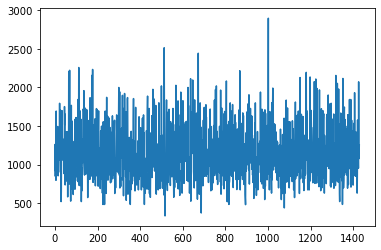

In [233]:
# Plot the distribution
plt.plot(train_df['1stFlrSF'].values)
plt.show()

<u>Observation:</u> Remove that are greater than 2500 which may look outlier.

In [234]:
# Count the number of sample will be present if we remove those sample which
# have greater than 2500
count = 0
store_value = []
for i in train_df['1stFlrSF']:
    if np.isnan(i):
        count += 1
    elif i <= 2500:
        count += 1
        store_value.append(i)
    else:
        continue

total_frac = (count/train_df.shape[0])*100
print('Number of sample will be remaining:',count,'({} %)'.format(total_frac))

Number of sample will be remaining: 1428 (99.86013986013987 %)


In [235]:
# Store the fillna value into dict()
fillna_value['1stFlrSF'] = np.mean(store_value)
fillna_value['1stFlrSF']

1141.9565826330531

In [236]:
# Remove that are greater than 2500
train_df = train_df[train_df['1stFlrSF'] <= 2500]
train_df.shape # Check the number of samples

(1428, 80)

In [237]:
# Check missing value in test data
print(test_df['1stFlrSF'].isna().any())

False


## 2ndFlrSF

In [238]:
# Its numerical feature
train_df['2ndFlrSF'].isna().any()

False

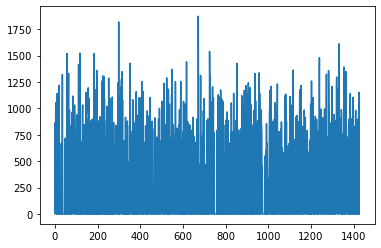

In [239]:
# Plot the distribution
plt.plot(train_df['2ndFlrSF'].values)
plt.show()

<u>Observation</u>: Remove those whose value is greater than 1500 which may contain outliers

In [240]:
# Count the number of sample will be present if we remove those sample which
# have greater than 1500
count = 0
store_value = []
for i in train_df['2ndFlrSF']:
    if np.isnan(i):
        count += 1
    elif i <= 1500:
        count += 1
        store_value.append(i)
    else:
        continue

total_frac = (count/train_df.shape[0])*100
print('Number of sample will be remaining:',count,'({} %)'.format(total_frac))

Number of sample will be remaining: 1421 (99.50980392156863 %)


In [241]:
# Store the fillna value into dict()
fillna_value['2ndFlrSF'] = np.mean(store_value)
fillna_value['2ndFlrSF']

339.31245601688954

In [242]:
# Remove that are greater than 2500
train_df = train_df[train_df['2ndFlrSF'] <= 1500]
train_df.shape # Check the number of samples

(1421, 80)

In [243]:
# Check missing value in test data
print(test_df['2ndFlrSF'].isna().any())

False


## LowQualFinSF

In [244]:
# Its numerical feature
train_df['LowQualFinSF'].isna().any()

False

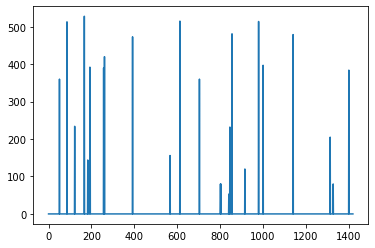

In [245]:
# Plot the distribution
plt.plot(train_df['LowQualFinSF'].values)
plt.show()

<u>Observation</u>: Its seems we can't conclude anything from this. So, we can neglect it.

In [246]:
# Store the fillna value into dict()
fillna_value['LowQualFinSF'] = np.median(train_df['LowQualFinSF'].values)
fillna_value['LowQualFinSF']

0.0

In [247]:
# Check missing value in test data
print(test_df['LowQualFinSF'].isna().any())

False


## GrLivArea

In [248]:
# Its numerical feature
train_df['GrLivArea'].isna().any()

False

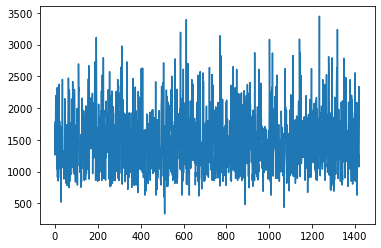

In [249]:
# Plot the distribution
plt.plot(train_df['GrLivArea'].values)
plt.show()

In [250]:
# Count the number of sample will be present if we remove those sample which
# have greater than 3000
count = 0
store_value = []
for i in train_df['GrLivArea']:
    if np.isnan(i):
        count += 1
    elif i <= 3000:
        count += 1
        store_value.append(i)
    else:
        continue

total_frac = (count/train_df.shape[0])*100
print('Number of sample will be remaining:',count,'({} %)'.format(total_frac))

Number of sample will be remaining: 1413 (99.43701618578466 %)


In [251]:
# Store the fillna value into dict()
fillna_value['GrLivArea'] = np.mean(store_value)
fillna_value['GrLivArea']

1475.0297239915074

In [252]:
# Remove that are greater than 3000
train_df = train_df[train_df['GrLivArea'] <= 3000]
train_df.shape # Check the number of samples

(1413, 80)

In [253]:
# Check missing value in test data
print(test_df['GrLivArea'].isna().any())

False


## BsmtFullBath

In [254]:
train_df['BsmtFullBath'].isna().any()

False

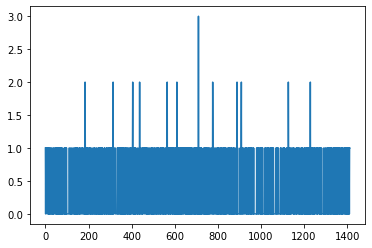

In [255]:
# Plot the distribution
plt.plot(train_df['BsmtFullBath'].values)
plt.show()

<u>Observation:</u> We can't conclude anything.

In [256]:
# Store fillna value into dict()
fillna_value['BsmtFullBath'] = np.median(train_df['BsmtFullBath'].values)
fillna_value['BsmtFullBath']

0.0

In [257]:
# Check missing value in test data
print(test_df['BsmtFullBath'].isna().any())

True


In [258]:
# Replace with the fillna value
test_df['BsmtFullBath'].fillna(fillna_value['BsmtFullBath'], inplace=True)

In [259]:
# Check again if any missing value in test data
print(test_df['BsmtFullBath'].isna().any())

False


## BsmtHalfBath

In [260]:
# It's numcerical feature
train_df['BsmtHalfBath'].isna().any()

False

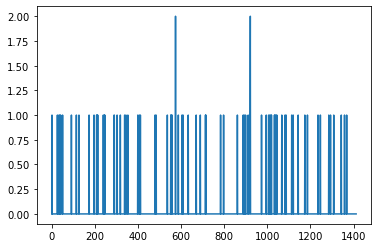

In [261]:
# Plot distribution
plt.plot(train_df['BsmtHalfBath'].values)
plt.show()

<u>Observation:</u> We can't conclude anything.

In [262]:
# Store fillna value into dict()
fillna_value['BsmtHalfBath'] = np.median(train_df['BsmtHalfBath'].values)
fillna_value['BsmtHalfBath']

0.0

In [263]:
# Check missing value in test data
print(test_df['BsmtHalfBath'].isna().any())

True


In [264]:
# Replace with the fillna value
test_df['BsmtHalfBath'].fillna(fillna_value['BsmtHalfBath'], inplace=True)

In [265]:
# Check again if any missing value in test data
print(test_df['BsmtHalfBath'].isna().any())

False


## FullBath

In [266]:
# It's numcerical feature
train_df['FullBath'].isna().any()

False

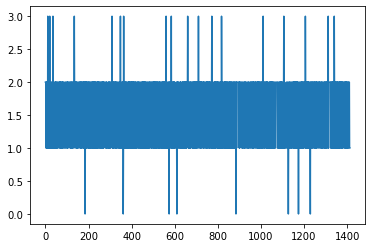

In [267]:
# Plot distribution
plt.plot(train_df['FullBath'].values)
plt.show()

<u>Observation:</u> We can't conclude anything.

In [268]:
# Store the fillna value into dict()
fillna_value['FullBath'] = np.median(train_df['FullBath'].values)
fillna_value['FullBath']

2.0

In [269]:
# Check missing value in test data
print(test_df['FullBath'].isna().any())

False


## HalfBath

In [270]:
# It's numcerical feature
train_df['HalfBath'].isna().any()

False

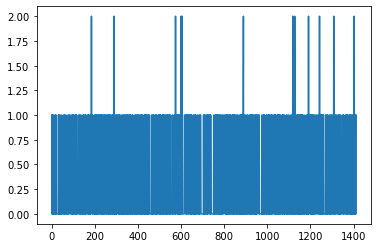

In [271]:
# Plot distribution
plt.plot(train_df['HalfBath'].values)
plt.show()

<u>Observation:</u> We can't conclude anything.

In [272]:
# Store fillna value into dict()
fillna_value['HalfBath'] = np.median(train_df['HalfBath'].values)
fillna_value['HalfBath']

0.0

In [273]:
# Check missing value in test data
print(test_df['HalfBath'].isna().any())

False


## Bedroom

In [274]:
# It's numcerical feature
train_df['BedroomAbvGr'].isna().any()

False

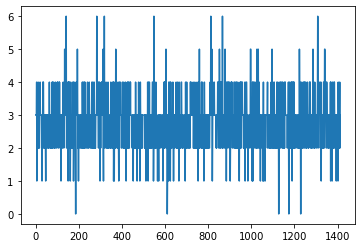

In [275]:
# Plot distribution
plt.plot(train_df['BedroomAbvGr'].values)
plt.show()

<u>Observation:</u> We can't conclude anything.

In [276]:
# Store fillna value into dict()
fillna_value['BedroomAbvGr'] = np.median(train_df['BedroomAbvGr'].values)
fillna_value['BedroomAbvGr']

3.0

In [277]:
# Check missing value in test data
print(test_df['BedroomAbvGr'].isna().any())

False


## Kitchen

In [278]:
# It's numcerical feature
train_df['KitchenAbvGr'].isna().any()

False

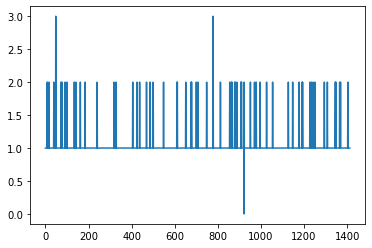

In [279]:
# Plot distribution
plt.plot(train_df['KitchenAbvGr'].values)
plt.show()

<u>Observation:</u> We can't conclude anything.

In [280]:
# Store fillna value into dict()
fillna_value['KitchenAbvGr'] = np.median(train_df['KitchenAbvGr'].values)
fillna_value['KitchenAbvGr']

1.0

In [281]:
# Check missing value in test data
print(test_df['KitchenAbvGr'].isna().any())

False


## KitchenQual

In [282]:
printing_values_for_column(category_column,train_df,'KitchenQual')

Value provide by data description:
 ['Ex', 'Fa', 'Gd', 'Po', 'TA']
Value from train column:
 ['Ex', 'Fa', 'Gd', 'TA']


In [283]:
# No mispelled and missing value
# Store the fillna value into dict()
fillna_value['KitchenQual'] = train_df['KitchenQual'].mode()[0]
fillna_value['KitchenQual']

'TA'

In [284]:
# Check if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'KitchenQual')

There is missing value


In [285]:
test_df['KitchenQual'].fillna(fillna_value['KitchenQual'], inplace=True)

In [286]:
# Check again if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'KitchenQual')

Value provide by data description:
 ['Ex', 'Fa', 'Gd', 'Po', 'TA']
Value from train column:
 ['Ex', 'Fa', 'Gd', 'TA']


## TotRmsAbvGrd

In [287]:
# It's numcerical feature
train_df['TotRmsAbvGrd'].isna().any()

False

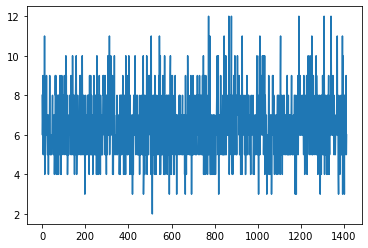

In [288]:
# Plot distribution
plt.plot(train_df['TotRmsAbvGrd'].values)
plt.show()

<u>Observation:</u> We can't conclude anything.

In [289]:
# Store fillna value by dict()
fillna_value['TotRmsAbvGrd'] = np.median(train_df['TotRmsAbvGrd'].values)
fillna_value['TotRmsAbvGrd']

6.0

In [290]:
# Check missing value in test data
print(test_df['TotRmsAbvGrd'].isna().any())

False


## Functional

In [291]:
printing_values_for_column(category_column,train_df,'Functional')

Value provide by data description:
 ['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sal', 'Sev', 'Typ']
Value from train column:
 ['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev', 'Typ']


In [292]:
# No mispelled and missing value
# Store the fillna value into dict()
fillna_value['Functional'] = train_df['Functional'].mode()[0]
fillna_value['Functional']

'Typ'

In [293]:
# Check if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'Functional')

There is missing value


In [294]:
test_df['Functional'].fillna(fillna_value['Functional'], inplace=True)

In [295]:
# Check again if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'Functional')

Value provide by data description:
 ['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sal', 'Sev', 'Typ']
Value from train column:
 ['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev', 'Typ']


## Fireplaces

In [296]:
# It's numcerical feature
train_df['Fireplaces'].isna().any()

False

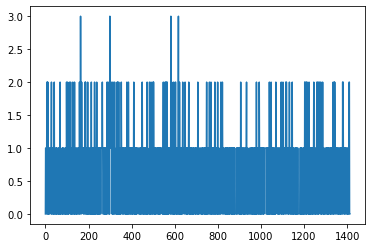

In [297]:
# Plot distribution
plt.plot(train_df['Fireplaces'].values)
plt.show()

<u>Observation:</u> We can't conclude anything.

In [298]:
# Store fillna value by dict()
fillna_value['Fireplaces'] = np.median(train_df['Fireplaces'].values)
fillna_value['Fireplaces']

1.0

In [299]:
# Check missing value in test data
print(test_df['Fireplaces'].isna().any())

False


## FireplaceQu

In [300]:
printing_values_for_column(category_column,train_df,'FireplaceQu')

There is missing value


In [301]:
# There is missing values. However, in data description.txt
# It described NA as No Fireplace
train_df['FireplaceQu'].fillna('NA', inplace=True)

In [302]:
printing_values_for_column(category_column,train_df,'FireplaceQu')

Value provide by data description:
 ['Ex', 'Fa', 'Gd', 'NA', 'Po', 'TA']
Value from train column:
 ['Ex', 'Fa', 'Gd', 'NA', 'Po', 'TA']


In [303]:
# No mispelled and missing value
# Store the fillna value into dict()
fillna_value['FireplaceQu'] = train_df['FireplaceQu'].mode()[0]
fillna_value['FireplaceQu']

'NA'

In [304]:
# Check if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'FireplaceQu')

There is missing value


In [305]:
test_df['FireplaceQu'].fillna('NA', inplace=True)

In [306]:
# Check again if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'FireplaceQu')

Value provide by data description:
 ['Ex', 'Fa', 'Gd', 'NA', 'Po', 'TA']
Value from train column:
 ['Ex', 'Fa', 'Gd', 'NA', 'Po', 'TA']


## GarageType

In [307]:
printing_values_for_column(category_column,train_df,'GarageType')

There is missing value


In [308]:
# There is missing values. However, in data description.txt
# It described NA as No Garage.
train_df['GarageType'].fillna('NA', inplace=True)

In [309]:
printing_values_for_column(category_column,train_df,'GarageType')

Value provide by data description:
 ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'NA']
Value from train column:
 ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'NA']


In [310]:
# No mispelled and missing value
# Store the fillna value into dict()
fillna_value['GarageType'] = train_df['GarageType'].mode()[0]
fillna_value['GarageType']

'Attchd'

In [311]:
# Check if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'GarageType')

There is missing value


In [312]:
test_df['GarageType'].fillna('NA', inplace=True)

In [313]:
# Check again if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'GarageType')

Value provide by data description:
 ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'NA']
Value from train column:
 ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'NA']


## GarageYrBlt and GarageFinish

We don't think that this feature has the huge impact. We already feature engg. from the YearBlt and RemodYrBlt

In [314]:
train_df.drop(['GarageYrBlt','GarageFinish'], axis=1,inplace=True)
test_df.drop(['GarageYrBlt','GarageFinish'], axis=1,inplace=True)

## GarageCars

In [315]:
# It's numcerical feature
train_df['GarageCars'].isna().any()

False

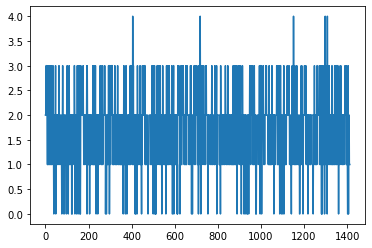

In [316]:
# Plot distribution
plt.plot(train_df['GarageCars'].values)
plt.show()

In [317]:
# Take mean of all
fillna_value['GarageCars'] = np.median(train_df['GarageCars'].values)
fillna_value['GarageCars']

2.0

In [318]:
# Check missing value in test data
print(test_df['GarageCars'].isna().any())

True


In [319]:
test_df['GarageCars'].fillna(fillna_value['GarageCars'], inplace=True)

In [320]:
# Check again if any missing value in test data
print(test_df['GarageCars'].isna().any())

False


## GarageArea

In [321]:
# It's numcerical feature
train_df['GarageArea'].isna().any()

False

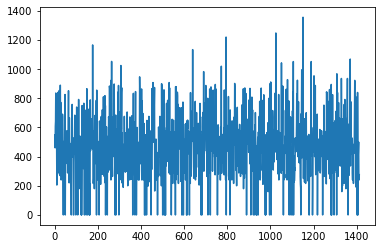

In [322]:
# Plot distribution
plt.plot(train_df['GarageArea'].values)
plt.show()

In [323]:
# Take mean of all
fillna_value['GarageArea'] = np.mean(train_df['GarageArea'].values)
fillna_value['GarageArea']

465.7721160651097

In [324]:
# Check missing value in test data
print(test_df['GarageArea'].isna().any())

True


In [325]:
test_df['GarageArea'].fillna(fillna_value['GarageArea'], inplace=True)

In [326]:
# Check again if any missing value in test data
print(test_df['GarageArea'].isna().any())

False


## GarageQual

In [327]:
printing_values_for_column(category_column,train_df,'GarageQual')

There is missing value


In [328]:
# There is missing values. However, in data description.txt
# It described NA as No Garage.
train_df['GarageQual'].fillna('NA', inplace=True)

In [329]:
printing_values_for_column(category_column,train_df,'GarageQual')

Value provide by data description:
 ['Ex', 'Fa', 'Gd', 'NA', 'Po', 'TA']
Value from train column:
 ['Ex', 'Fa', 'Gd', 'NA', 'Po', 'TA']


In [330]:
# No mispelled and missing value
# Store the fillna value into dict()
fillna_value['GarageQual'] = train_df['GarageQual'].mode()[0]
fillna_value['GarageQual']

'TA'

In [331]:
test_df['GarageQual']

0        TA
1        TA
2        TA
3        TA
4        TA
       ... 
1454    NaN
1455     TA
1456     TA
1457    NaN
1458     TA
Name: GarageQual, Length: 1459, dtype: object

In [332]:
# Check if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'GarageQual')

There is missing value


In [333]:
test_df['GarageQual'].fillna('NA', inplace=True)

In [334]:
# Check again if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'GarageQual')

Value provide by data description:
 ['Ex', 'Fa', 'Gd', 'NA', 'Po', 'TA']
Value from train column:
 ['Fa', 'Gd', 'NA', 'Po', 'TA']


## GarageCond

In [335]:
printing_values_for_column(category_column,train_df,'GarageCond')

There is missing value


In [336]:
# There is missing values. However, in data description.txt
# It described NA as No Garage.
train_df['GarageCond'].fillna('NA', inplace=True)

In [337]:
printing_values_for_column(category_column,train_df,'GarageCond')

Value provide by data description:
 ['Ex', 'Fa', 'Gd', 'NA', 'Po', 'TA']
Value from train column:
 ['Ex', 'Fa', 'Gd', 'NA', 'Po', 'TA']


In [338]:
# No mispelled and missing value
# Store the fillna value into dict()
fillna_value['GarageCond'] = train_df['GarageCond'].mode()[0]
fillna_value['GarageCond']

'TA'

In [339]:
# Check if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'GarageCond')

There is missing value


In [340]:
test_df['GarageCond'].fillna('NA', inplace=True)

In [341]:
# Check again if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'GarageCond')

Value provide by data description:
 ['Ex', 'Fa', 'Gd', 'NA', 'Po', 'TA']
Value from train column:
 ['Ex', 'Fa', 'Gd', 'NA', 'Po', 'TA']


## PavedDrive

In [342]:
printing_values_for_column(category_column,train_df,'PavedDrive')

Value provide by data description:
 ['N', 'P', 'Y']
Value from train column:
 ['N', 'P', 'Y']


In [343]:
# No mispelled and missing value
# Store the fillna value into dict()
fillna_value['PavedDrive'] = train_df['PavedDrive'].mode()[0]
fillna_value['PavedDrive']

'Y'

In [344]:
# Check if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'PavedDrive')

Value provide by data description:
 ['N', 'P', 'Y']
Value from train column:
 ['N', 'P', 'Y']


## WoodDeckSF

In [345]:
# It's numcerical feature
train_df['WoodDeckSF'].isna().any()

False

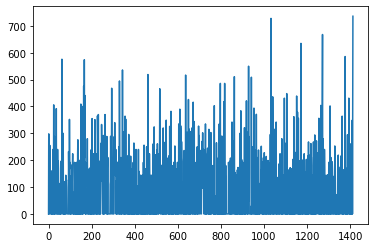

In [346]:
# Plot distribution
plt.plot(train_df['WoodDeckSF'].values)
plt.show()

In [347]:
# Can't seems any outlier.
# Store fillna value using dict()
fillna_value['WoodDeckSF'] = np.mean(train_df['WoodDeckSF'].values)
fillna_value['WoodDeckSF']

90.9858457183298

In [348]:
# Check missing value in test data
print(test_df['WoodDeckSF'].isna().any())

False


## OpenPorchSF

In [349]:
# It's numcerical feature
train_df['OpenPorchSF'].isna().any()

False

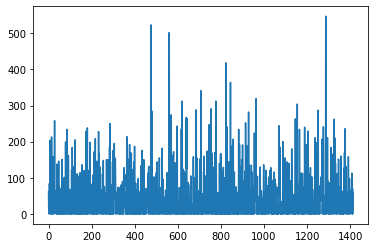

In [350]:
# Plot distribution
plt.plot(train_df['OpenPorchSF'].values)
plt.show()

In [351]:
# Count the number of sample will be present if we remove those sample which
# have greater than 400
count = 0
store_value = []
for i in train_df['OpenPorchSF']:
    if np.isnan(i):
        count += 1
    elif i <= 400:
        count += 1
        store_value.append(i)
    else:
        continue

total_frac = (count/train_df.shape[0])*100
print('Number of sample will be remaining:',count,'({} %)'.format(total_frac))

Number of sample will be remaining: 1409 (99.7169143665959 %)


In [352]:
# Store the fillna value into dict()
fillna_value['OpenPorchSF'] = np.mean(store_value)
fillna_value['OpenPorchSF']

44.386089425124204

In [353]:
# Remove that are greater than 400
train_df = train_df[train_df['OpenPorchSF'] <= 400]
train_df.shape # Check the number of samples

(1409, 78)

In [354]:
# Check missing value in test data
print(test_df['OpenPorchSF'].isna().any())

False


## EnclosedPorch

In [355]:
# It's numcerical feature
train_df['EnclosedPorch'].isna().any()

False

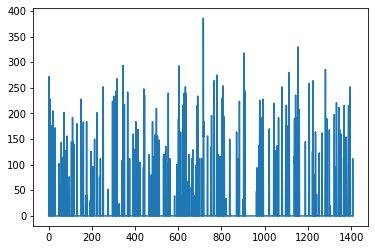

In [356]:
# Plot distribution
plt.plot(train_df['EnclosedPorch'].values)
plt.show()

In [357]:
# Store the fillna value into dict()
fillna_value['EnclosedPorch'] = train_df['EnclosedPorch'].mode()[0]
fillna_value['EnclosedPorch']

0

In [358]:
# Check missing value in test data
print(test_df['EnclosedPorch'].isna().any())

False


## 3SsnPorch

In [359]:
# It's numcerical feature
train_df['3SsnPorch'].isna().any()

False

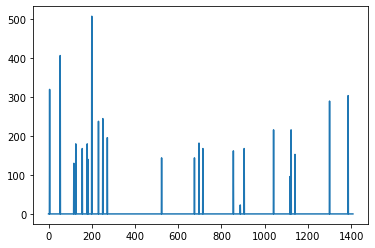

In [360]:
# Plot distribution
plt.plot(train_df['3SsnPorch'].values)
plt.show()

In [361]:
# Store the fillna value into dict()
fillna_value['3SsnPorch'] = train_df['3SsnPorch'].mode()[0]
fillna_value['3SsnPorch']

0

In [362]:
# Check missing value in test data
print(test_df['3SsnPorch'].isna().any())

False


## ScreenPorch

In [363]:
# It's numcerical feature
train_df['ScreenPorch'].isna().any()

False

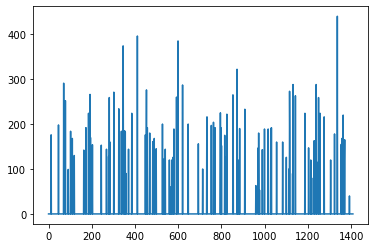

In [364]:
# Plot distribution
plt.plot(train_df['ScreenPorch'].values)
plt.show()

In [365]:
# Count the number of sample will be present if we remove those sample which
# have greater than 400
count = 0
store_value = []
for i in train_df['ScreenPorch']:
    if np.isnan(i):
        count += 1
    elif i <= 400:
        count += 1
        store_value.append(i)
    else:
        continue

total_frac = (count/train_df.shape[0])*100
print('Number of sample will be remaining:',count,'({} %)'.format(total_frac))

Number of sample will be remaining: 1408 (99.9290276792051 %)


In [366]:
# Store the fillna value into dict()
fillna_value['ScreenPorch'] = np.mean(store_value)
fillna_value['ScreenPorch']

13.939630681818182

In [367]:
# Remove that are greater than 400
train_df = train_df[train_df['ScreenPorch'] <= 400]
train_df.shape # Check the number of samples

(1408, 78)

In [368]:
# Check missing value in test data
print(test_df['ScreenPorch'].isna().any())

False


## PoolArea

In [369]:
# It's numcerical feature
train_df['PoolArea'].isna().any()

False

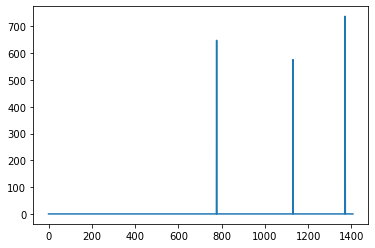

In [370]:
# Plot distribution
plt.plot(train_df['PoolArea'].values)
plt.show()

In [371]:
# Store the fillna value into dict()
fillna_value['PoolArea'] = train_df['PoolArea'].mode()[0]
fillna_value['PoolArea']

0

In [372]:
# Check missing value in test data
print(test_df['PoolArea'].isna().any())

False


## PoolQC

In [373]:
printing_values_for_column(category_column,train_df,'PoolQC')

There is missing value


In [374]:
# There is missing values. However, in data description.txt
# It described NA as No Pool.
train_df['PoolQC'].fillna('NA', inplace=True)

In [375]:
printing_values_for_column(category_column,train_df,'PoolQC')

Value provide by data description:
 ['Ex', 'Fa', 'Gd', 'NA', 'TA']
Value from train column:
 ['Fa', 'Gd', 'NA']


In [376]:
# No mispelled and missing value
# Store the fillna value into dict()
fillna_value['PoolQC'] = train_df['PoolQC'].mode()[0]
fillna_value['PoolQC']

'NA'

In [377]:
# Check if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'PoolQC')

There is missing value


In [378]:
test_df['PoolQC'].fillna('NA', inplace=True)

In [379]:
# Check again if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'PoolQC')

Value provide by data description:
 ['Ex', 'Fa', 'Gd', 'NA', 'TA']
Value from train column:
 ['Ex', 'Gd', 'NA']


## Fence

In [380]:
printing_values_for_column(category_column,train_df,'Fence')

There is missing value


In [381]:
# There is missing values. However, in data description.txt
# It described NA as No Fence.
train_df['Fence'].fillna('NA', inplace=True)

In [382]:
printing_values_for_column(category_column,train_df,'Fence')

Value provide by data description:
 ['GdPrv', 'GdWo', 'MnPrv', 'MnWw', 'NA']
Value from train column:
 ['GdPrv', 'GdWo', 'MnPrv', 'MnWw', 'NA']


In [383]:
# No mispelled and missing value
# Store the fillna value into dict()
fillna_value['Fence'] = train_df['Fence'].mode()[0]
fillna_value['Fence']

'NA'

In [384]:
# Check if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'Fence')

There is missing value


In [385]:
test_df['Fence'].fillna('NA', inplace=True)

In [386]:
# Check again if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'Fence')

Value provide by data description:
 ['GdPrv', 'GdWo', 'MnPrv', 'MnWw', 'NA']
Value from train column:
 ['GdPrv', 'GdWo', 'MnPrv', 'MnWw', 'NA']


## MiscFeature

In [387]:
printing_values_for_column(category_column,train_df,'MiscFeature')

There is missing value


In [388]:
# There is missing values. However, in data description.txt
# It described NA as None.
train_df['MiscFeature'].fillna('NA', inplace=True)

In [389]:
printing_values_for_column(category_column,train_df,'MiscFeature')

Value provide by data description:
 ['Elev', 'Gar2', 'NA', 'Othr', 'Shed', 'TenC']
Value from train column:
 ['Gar2', 'NA', 'Othr', 'Shed']


In [390]:
# No mispelled and missing value
# Store the fillna value into dict()
fillna_value['MiscFeature'] = train_df['MiscFeature'].mode()[0]
fillna_value['MiscFeature']

'NA'

In [391]:
# Check if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'MiscFeature')

There is missing value


In [392]:
test_df['MiscFeature'].fillna('NA', inplace=True)

In [393]:
# Check again if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'MiscFeature')

Value provide by data description:
 ['Elev', 'Gar2', 'NA', 'Othr', 'Shed', 'TenC']
Value from train column:
 ['Gar2', 'NA', 'Othr', 'Shed']


## MiscVal

In [394]:
# It's numcerical feature
train_df['MiscVal'].isna().any()

False

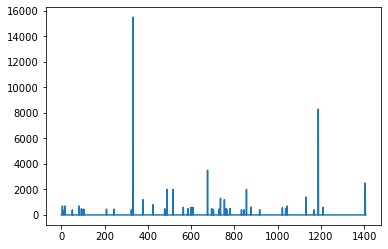

In [395]:
# Plot distribution
plt.plot(train_df['MiscVal'].values)
plt.show()

In [396]:
# Count the number of sample will be present if we remove those sample which
# have greater than 10000
count = 0
store_value = []
for i in train_df['MiscVal']:
    if np.isnan(i):
        count += 1
    elif i <= 10000:
        count += 1
        store_value.append(i)
    else:
        continue

total_frac = (count/train_df.shape[0])*100
print('Number of sample will be remaining:',count,'({} %)'.format(total_frac))

Number of sample will be remaining: 1407 (99.92897727272727 %)


In [397]:
# Store the fillna value into dict()
fillna_value['MiscVal'] = np.mean(store_value)
fillna_value['MiscVal']

31.01918976545842

In [398]:
# Remove that are greater than 10000
train_df = train_df[train_df['MiscVal'] <= 10000]
train_df.shape # Check the number of samples

(1407, 78)

In [399]:
# Check missing value in test data
print(test_df['MiscVal'].isna().any())

False


## MoSold and YrSold

We don't need this feature as it wll not impact on 'SalePrices'

In [400]:
train_df.drop(['MoSold','YrSold'], axis=1,inplace=True)
test_df.drop(['MoSold','YrSold'], axis=1,inplace=True)

In [401]:
train_df.shape, test_df.shape

((1407, 76), (1459, 75))

## SaleType

In [402]:
printing_values_for_column(category_column,train_df,'SaleType')

Value provide by data description:
 ['COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'New', 'Oth', 'VWD', 'WD']
Value from train column:
 ['COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'New', 'Oth', 'WD']


In [403]:
# No mispelled and missing value
# Store the fillna value into dict()
fillna_value['SaleType'] = train_df['SaleType'].mode()[0]
fillna_value['SaleType']

'WD'

In [404]:
# Check if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'SaleType')

There is missing value


In [405]:
test_df['SaleType'].fillna(fillna_value['SaleType'], inplace=True)

In [406]:
# Check again if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'SaleType')

Value provide by data description:
 ['COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'New', 'Oth', 'VWD', 'WD']
Value from train column:
 ['COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'New', 'Oth', 'WD']


## SaleCondition

In [407]:
printing_values_for_column(category_column,train_df,'SaleCondition')

Value provide by data description:
 ['Abnormal', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial']
Value from train column:
 ['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial']


In [408]:
# There is mispelled
train_df['SaleCondition'].replace(to_replace='Abnorml', value='Abnormal',
                                  inplace=True)

In [409]:
printing_values_for_column(category_column,train_df,'SaleCondition')

Value provide by data description:
 ['Abnormal', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial']
Value from train column:
 ['Abnormal', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial']


In [410]:
# No mispelled and missing value
# Store the fillna value into dict()
fillna_value['SaleCondition'] = train_df['SaleCondition'].mode()[0]
fillna_value['SaleCondition']

'Normal'

In [411]:
# Check if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'SaleCondition')

Value provide by data description:
 ['Abnormal', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial']
Value from train column:
 ['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial']


In [412]:
# There is mispelled
test_df['SaleCondition'].replace(to_replace='Abnorml', value='Abnormal',
                                  inplace=True)

In [413]:
# Check if any misspelled or missing value in test data?
printing_values_for_column(category_column,test_df,'SaleCondition')

Value provide by data description:
 ['Abnormal', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial']
Value from train column:
 ['Abnormal', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial']


# Saving into another clean train and test csv file

In [414]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1407 non-null   int64  
 1   MSSubClass     1407 non-null   int64  
 2   MSZoning       1407 non-null   object 
 3   LotFrontage    1407 non-null   float64
 4   LotArea        1407 non-null   int64  
 5   Street         1407 non-null   object 
 6   Alley          1407 non-null   object 
 7   LotShape       1407 non-null   object 
 8   LandContour    1407 non-null   object 
 9   Utilities      1407 non-null   object 
 10  LotConfig      1407 non-null   object 
 11  LandSlope      1407 non-null   object 
 12  Neighborhood   1407 non-null   object 
 13  Condition1     1407 non-null   object 
 14  Condition2     1407 non-null   object 
 15  BldgType       1407 non-null   object 
 16  HouseStyle     1407 non-null   object 
 17  OverallQual    1407 non-null   int64  
 18  OverallC

In [415]:
train_df.to_csv(pwdDir+'/clean_train.csv',index=False)

In [416]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [417]:
test_df.to_csv(pwdDir+'/clean_test.csv', index=False)

In [418]:
import pickle
with open(pwdDir+"/fillna_value.pkl", "wb") as f:
    pickle.dump(fillna_value, f)

In [419]:
# To load pkl
# with open(pwdDir+"/fillna_value.pkl", "rb") as f:
#   pickle.load(f)